Talitha Almira Zada - Data Science

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import load_wine

# Load dataset and convert to DataFrame
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print(pd.Series(data['target']).value_counts())

1    71
0    59
2    48
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('target', axis=1))
scaled_features = scaler.transform(df.drop('target',
										axis=1))

df_feat = pd.DataFrame(scaled_features,
					columns=df.columns[:-1])
df_feat.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_wine

# Split the data into training and testing sets with random_state to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['target'], test_size=0.20, random_state=42)

# Create and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=1 as per your original code
knn.fit(X_train, y_train)

# Make predictions
pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



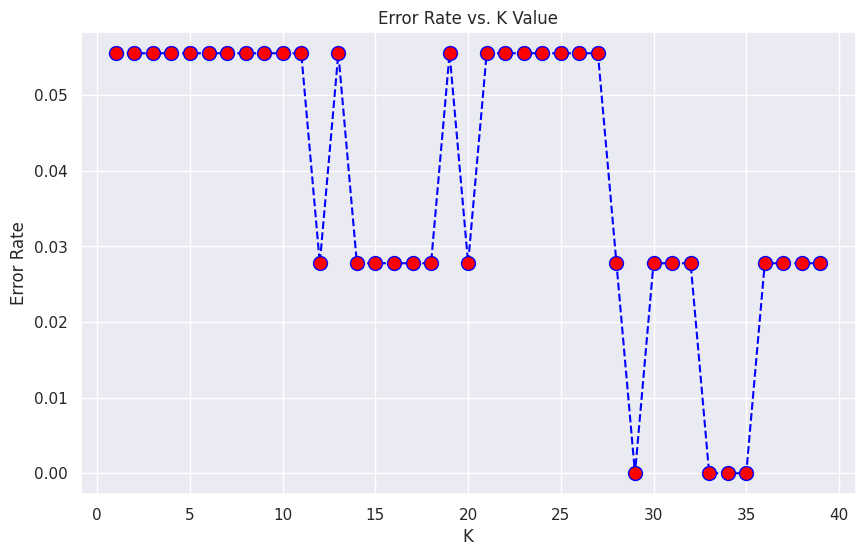

In [ ]:
error_rate = []

for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Loop over a range of k values
for k in range(1, 11):  # You can change the range (1 to 10) for a wider test of k values
    print(f"Evaluating KNN with k={k}")

    # Create and fit KNN model with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions
    pred = knn.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("\nClassification Report:\n", classification_report(y_test, pred))
    print("-" * 50)  # Separator for clarity between each k


Evaluating KNN with k=1
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

--------------------------------------------------
Evaluating KNN with k=2
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.9

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Menghitung precision, recall, dan F1-score
precision = precision_score(y_test, pred, average='weighted') # Using pred instead of y_pred
recall = recall_score(y_test, pred, average='weighted') # Changed y_val to y_test
f1 = f1_score(y_test, pred, average='weighted') # Using pred instead of y_pred

In [ ]:
# Menampilkan hasil
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9493827160493827
Recall: 0.9444444444444444
F1 Score: 0.9436036129748098


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_wine

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Scaling the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['target']))

# Split the data into training and testing sets with random_state to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['target'], test_size=0.20, random_state=42)

# Evaluate KNN with multiple values of k using cross-validation
for k in range(1, 11):  # Test for k values from 1 to 10
    print(f"Evaluating KNN with k={k}")

    # Create and fit KNN model with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Cross-validation on training data
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation

    print(f"Cross-validated accuracy for k={k}: {cv_scores.mean():.4f}")
    print("-" * 50)


Evaluating KNN with k=1
Cross-validated accuracy for k=1: 0.9505
--------------------------------------------------
Evaluating KNN with k=2
Cross-validated accuracy for k=2: 0.9298
--------------------------------------------------
Evaluating KNN with k=3
Cross-validated accuracy for k=3: 0.9576
--------------------------------------------------
Evaluating KNN with k=4
Cross-validated accuracy for k=4: 0.9436
--------------------------------------------------
Evaluating KNN with k=5
Cross-validated accuracy for k=5: 0.9579
--------------------------------------------------
Evaluating KNN with k=6
Cross-validated accuracy for k=6: 0.9510
--------------------------------------------------
Evaluating KNN with k=7
Cross-validated accuracy for k=7: 0.9438
--------------------------------------------------
Evaluating KNN with k=8
Cross-validated accuracy for k=8: 0.9438
--------------------------------------------------
Evaluating KNN with k=9
Cross-validated accuracy for k=9: 0.9438
-------